In [2]:
import numpy as np
import pandas as pd
import ee
import requests
import os
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterio.mask import mask
# Initialize the Earth Engine API
ee.Initialize(project='ts-rishimnb')


<Axes: >

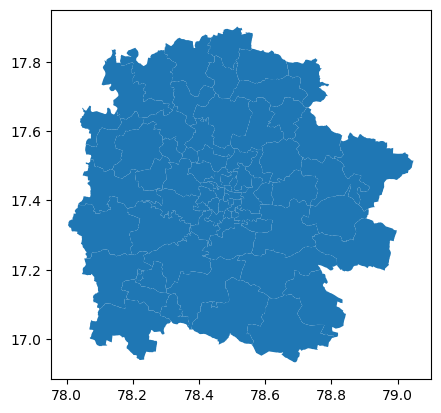

In [39]:
def get_landsat(start_date,end_date, file_name, bbox):
    bbox=ee.Geometry.Rectangle(bbox)
    image_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
    .filterBounds(bbox) \
    .filterDate(start_date,end_date) \

    img =image_collection.mean()
    url = img.getDownloadUrl({
        'bands': [
        "SR_B5","SR_B6","QA_PIXEL"],
        'region': bbox,
        'scale': 100,
        'format': 'GEO_TIFF'
    })
    response = requests.get(url)
    with open(file_name, 'wb') as fd:
        fd.write(response.content)

shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
gdf.plot()

In [40]:
bbox=gdf.total_bounds
bbox=bbox.tolist()

In [41]:
bbox

[78.00405825700005, 16.932643511000038, 79.04971835800006, 17.901507061000075]

In [42]:
for year in range(2014,2024):
    start_date=f"{year}-12-01"
    end_date=f"{year}-12-31"
    file_name=fr"C:\Users\rishi\ml_projects\climate\ndbi\dec_{year}_100.tif"
    get_landsat(start_date=start_date,end_date=end_date,file_name=file_name,bbox=bbox)

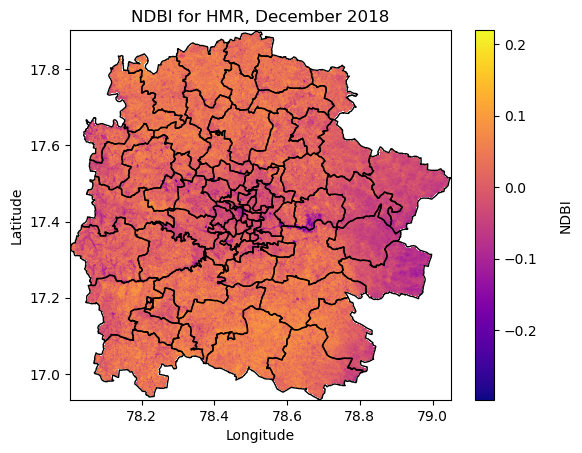

In [101]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt
import geopandas as gpd

# Open image
src = rio.open(r"C:\Users\rishi\ml_projects\climate\ndbi\dec_2018_100.tif")

# Apply shapefile mask
masked, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)

# Bands
nir = masked[0]
swir = masked[1]
# qa = masked[2].astype(np.uint16)  # Ensure correct type

# === Create valid QA mask ===
# # This example masks out pixels where bit 6 (cloud shadow) or bit 7 (cloud) is set
# # You can modify which bits depending on your QA band structure
# cloud_shadow = (qa >> 1) & 1
# cloud = (qa >> 3) & 1

# # Valid = not cloud and not shadow
# valid_mask = (cloud_shadow == 0) & (cloud == 0)

# # Prevent divide by zero
# with np.errstate(divide='ignore', invalid='ignore'):
ndbi = (swir - nir) / (swir + nir)
#     ndbi[~valid_mask] = np.nan  # Apply QA mask
# mask=ndbi>0.1
# ndbi[~mask]=np.nan
# ndbi[ndbi <= -0.05] = np.nan
# # === Plot NDBI ===
fig, ax = plt.subplots()
img = ax.imshow(ndbi, cmap='plasma', extent=rio.plot.plotting_extent(src, transform=masked_transform))
cbar = fig.colorbar(img, ax=ax, orientation='vertical')
cbar.set_label('NDBI', rotation=90, labelpad=15)
gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
ax.set_title("NDBI for HMR, December 2018")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [95]:
count=ndbi.shape[0]*ndbi.shape[1]-np.sum(np.isnan(ndbi))
count

12184

In [91]:
print(np.nanmax(ndbi),np.nanmin(ndbi),np.nanmean(ndbi))
count = np.sum(ndbi > 0.1)
print(count)

0.2602344107241703 0.05000146631866037 0.0713509313355864
12184


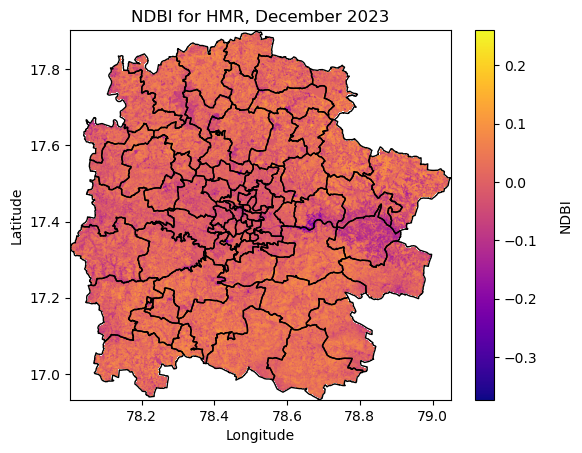

In [100]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt
import geopandas as gpd

# Open image
src = rio.open(r"C:\Users\rishi\ml_projects\climate\ndbi\dec_2023_100.tif")

# Apply shapefile mask
masked, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)

# Bands
nir = masked[0]
swir = masked[1]
# qa = masked[2].astype(np.uint16)  # Ensure correct type

# === Create valid QA mask ===
# This example masks out pixels where bit 6 (cloud shadow) or bit 7 (cloud) is set
# You can modify which bits depending on your QA band structure
# cloud_shadow = (qa >> 1) & 1
# cloud = (qa >> 3) & 1

# # Valid = not cloud and not shadow
# valid_mask = (cloud_shadow == 0) & (cloud == 0)

# # Prevent divide by zero
# with np.errstate(divide='ignore', invalid='ignore'):
ndbi = (swir - nir) / (swir + nir)
#     ndbi[~valid_mask] = np.nan  # Apply QA mask

# === Plot NDBI ===
fig, ax = plt.subplots()
img = ax.imshow(ndbi, cmap='plasma', extent=rio.plot.plotting_extent(src, transform=masked_transform))
cbar = fig.colorbar(img, ax=ax, orientation='vertical')
cbar.set_label('NDBI', rotation=90, labelpad=15)
gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
ax.set_title("NDBI for HMR, December 2023")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [62]:
print(np.nanmax(ndbi),np.nanmin(ndbi),np.nanmean(ndbi))
count = np.sum(ndbi > 0.1)
print(count)

0.2602344107241703 -0.3732171596647983 0.012864988261035848
11936


In [107]:
min_v=[]
max_v=[]
median_v=[]
urb=[]
for year in range(2014,2024):
    file_name=fr"C:\Users\rishi\ml_projects\climate\ndbi\dec_{year}_100.tif"


    # Open image
    src = rio.open(file_name)

    # Apply shapefile mask
    masked, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)

    # Bands
    nir = masked[0]
    swir = masked[1]
    # qa = masked[2].astype(np.uint16)  # Ensure correct type

    # # === Create valid QA mask ===
    # # This example masks out pixels where bit 6 (cloud shadow) or bit 7 (cloud) is set
    # # You can modify which bits depending on your QA band structure
    # cloud_shadow = (qa >> 1) & 1
    # cloud = (qa >> 3) & 1

    # # Valid = not cloud and not shadow
    # valid_mask = (cloud_shadow == 0) & (cloud == 0)

    # # Prevent divide by zero
    # with np.errstate(divide='ignore', invalid='ignore'):
    ndbi = (swir - nir) / (swir + nir)
    #     ndbi[~valid_mask] = np.nan  # Apply QA mask
    count=np.sum(ndbi>=0.1)
    urb.append(count)


Text(0.5, 1.0, 'Number of Built-up Pixels (NDBI>=0.1)')

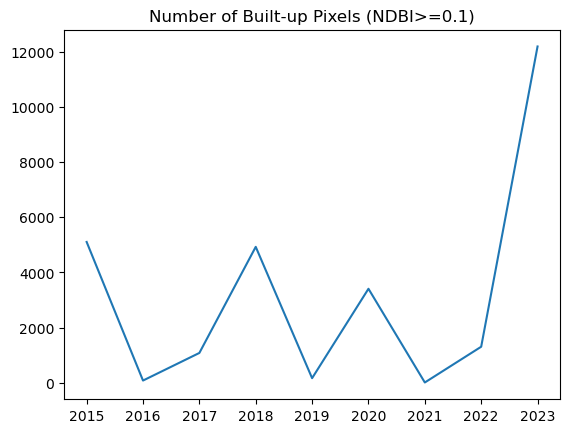

In [108]:
plt.plot(np.arange(2015,2024),urb[1:])
plt.title("Number of Built-up Pixels (NDBI>=0.1)")

In [71]:
from osgeo import gdal
from rasterio.enums import Resampling
input_image = r'C:\Users\rishi\ml_projects\climate\ndbi\dec_2020_100.tif'

# Define the target bounding box (xmin, ymin, xmax, ymax)
# These are the coordinates of the bounding box you want to crop to.
target_bbox = [78.00405826, 16.93264351, 79.04971836, 17.90150706]

# Path for the output cropped image
output_image = 'cropped_ndbi_image.tif'

# Open the image using GDAL
dataset = gdal.Open(input_image)

# Crop the image using gdal.Warp
gdal.Warp(output_image, dataset, outputBounds=target_bbox)

# Close the dataset
dataset = None

geo_tiff_path = 'cropped_ndbi_image.tif'
height_factor=1/35
width_factor=1/68
with rio.open(geo_tiff_path) as dataset:
    data = dataset.read(
    out_shape=(
        dataset.count,
        int(dataset.height * height_factor),
        int(dataset.width * width_factor)
    ),
    resampling=Resampling.average
)

# Scale image transform
transform = dataset.transform * dataset.transform.scale(
    (dataset.width / data.shape[-1]),
    (dataset.height / data.shape[-2])
)

# Define the new metadata for the output file
new_meta = dataset.meta.copy()
new_meta.update({
    'height': data.shape[1],
    'width': data.shape[2],
    'transform': transform
})

# Save the resampled image
with rio.open('resampled_image_ndbi.tif', 'w', **new_meta) as dst:
    dst.write(data)



In [72]:
csv=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2020_data\O3\December_O3.csv")
csv.shape

(30, 17)

In [73]:
src = rio.open(r"C:\Users\rishi\ml_projects\climate\Notebooks\resampled_image_ndbi.tif")
nir=src.read(1)
swir=src.read(2)
ndbi=(swir-nir)/(swir+nir)

In [74]:
from scipy.stats import pearsonr,spearmanr
co_f=csv.to_numpy().reshape(-1,)
ndbi_f=ndbi.reshape(-1,)
sp,p=spearmanr(co_f,ndbi_f)
sp

-0.21186905528958094